In [1]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np
import random
import pandas as pd


import skimage
from skimage.io import imread
from sklearn.metrics import mean_squared_error
import os

from skimage.color import rgb2gray

iteration=20

In [2]:
def get_Noise(image, prob):
    #'''
    #Add salt and pepper noise to image
    #prob: Probability of the noise
    #'''
    output = image.copy()
    if len(image.shape) == 2:
        black = 0
        white = 255            
    else:
        colorspace = image.shape[2]
        if colorspace == 3:  # RGB
            black = np.array([0, 0, 0], dtype='uint8')
            white = np.array([255, 255, 255], dtype='uint8')
        else:  # RGBA
            black = np.array([0, 0, 0, 255], dtype='uint8')
            white = np.array([255, 255, 255, 255], dtype='uint8')
    probs = np.random.random(output.shape[:2])
    output[probs < (prob / 2)] = black
    output[probs > 1 - (prob / 2)] = white
    return output

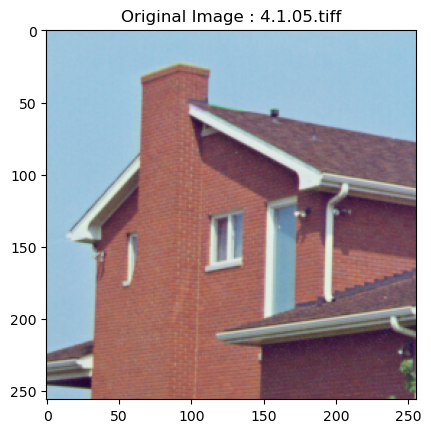

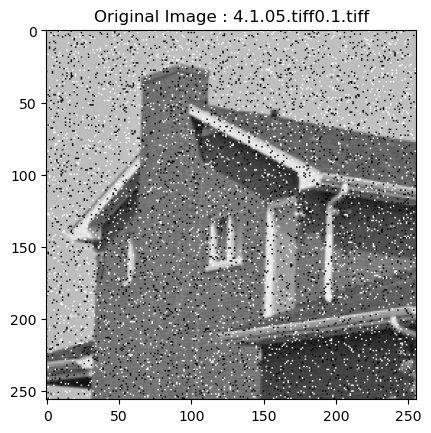

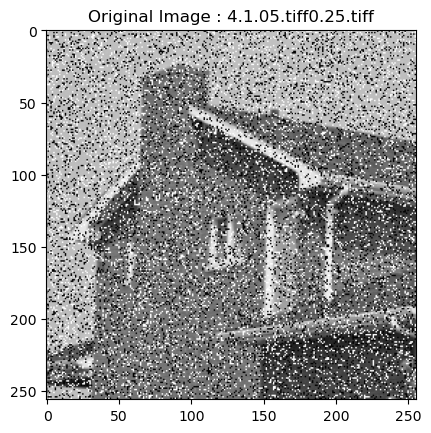

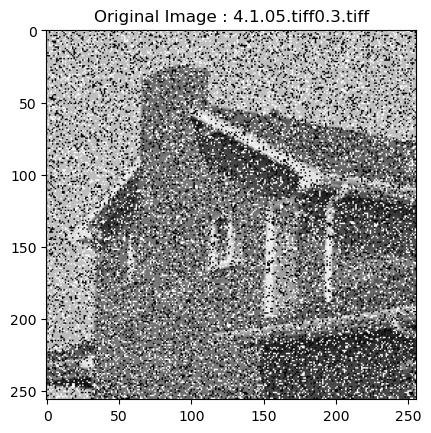

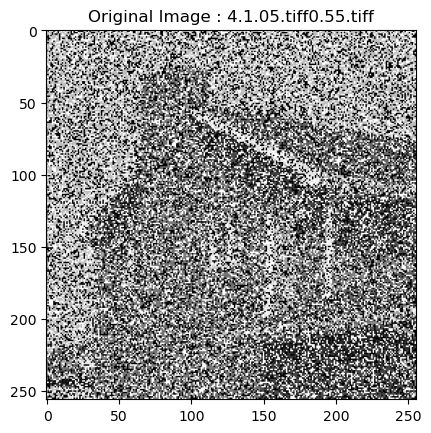

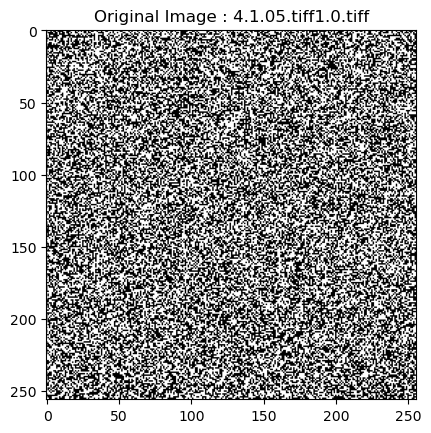

In [3]:
path='C://Users//Biswarup Mistry//Desktop//NoisyImage//'  #defining the image directory path
dir_list = os.listdir(path)
for item in dir_list :
    k=str(path+str(item))
    img = imread(k)
    
    plt.title('Original Image : '+item)
    plt.imshow(img,cmap=plt.cm.gray)
    plt.show()


In [6]:
path='C://Users//Biswarup Mistry//Desktop//NoisyImage//'
dir_list=os.listdir(path)
def saveImagesWithNoiseDensity():   #getting corresponding mse(s) for given noise density 'd'
    #dataframe = pd.DataFrame()    
    for item in dir_list :
        k=str(path+str(item))
        img = imread(k)
        #print(len(img.shape))
        density=[0.1,0.25,0.3,0.55,1.0]
        #while(i>0 and d<=1.0):
        for d in density:
            noise_img=get_Noise(img,d) 
            #---------------------- (conversion for SSIM)
            a=len(img.shape)
            if a!=2 : #if image is not gray, i.e., RGB
                #im = rgb2gray(img)
                noise_im=rgb2gray(noise_img)
                #rgb2gray(noise_img)
            else : #if image is Gray already
                #im=img
                #noise_im=get_Noise(im,d)
                noise_im=noise_img
            #---------------------- (conversion for SSIM)
            plt.imshow(noise_im,cmap=plt.cm.gray)
            plt.show()
            plt.imsave(str(path+str(item+str(d)+'.tiff')), noise_im,cmap=plt.cm.gray)




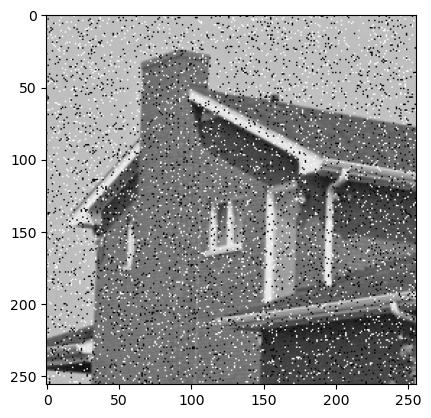

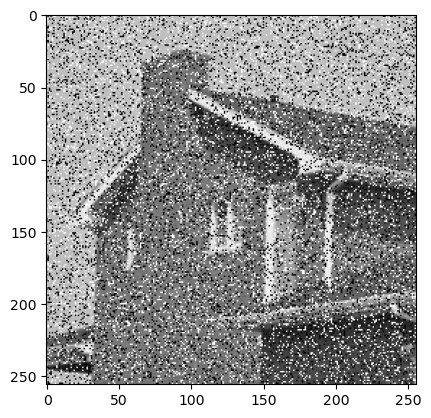

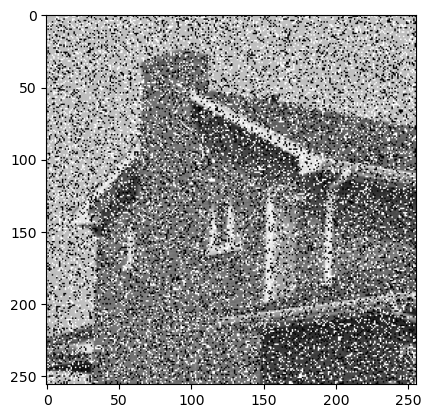

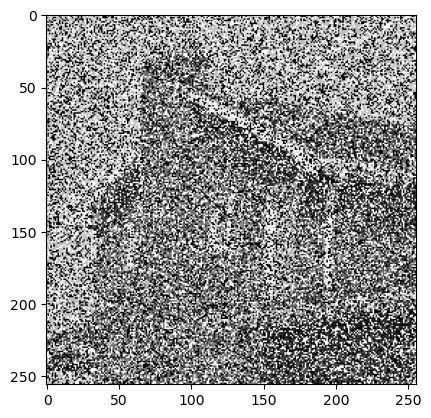

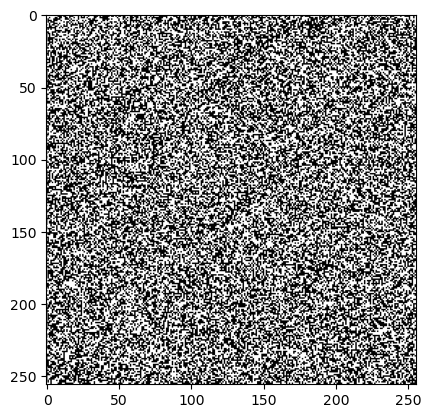

In [7]:
saveImagesWithNoiseDensity()